In [1]:
import openai

# Set your OpenAI API key
openai_api_key = ''
api_key = openai_api_key
# Initialize the OpenAI API client
openai.api_key = openai_api_key

So here we have an example of using the OpenAI API, specifically the ChatGPT model, to translate English text to French. However, in the prompt, there's only one message from the user asking to translate "Hello, how are you?" to French.

Here's what each part of the code does:

- `prompt`: This variable contains the text provided to the model as a prompt. In this case, it's asking to translate "Hello, how are you?" to French.

- `openai.ChatCompletion.create()`: This function sends a request to the OpenAI API to generate text based on the provided prompt.

- `model`: Specifies which version of the GPT model to use. In this case, it's "gpt-3.5-turbo-0613", which is a specific version of the GPT-3.5 model. You mentioned changing it to GPT-4, which implies using a different version of the model.

- `messages`: This parameter contains the conversation history, where the user's message is included. In this case, the user's message is the prompt.

- `max_tokens`: Specifies the maximum number of tokens (words or subwords) the model should generate in its response. In this case, it's set to 50.

The code snippet as it stands will generate a response from the model translating "Hello, how are you?" to French, with a maximum of 50 tokens in the response.

In [2]:
# Prompt for the AI model
prompt = "Translate the following English text to French: 'Hello, how are you?'"

# Make a request to the API to generate text
response = openai.ChatCompletion.create(
    # i can change this to gpt-4
    model="gpt-3.5-turbo-0613",  # Use the engine of your choice
    messages = [{"role": "user", "content": prompt}],
    max_tokens = 50
)

In [3]:
# response['choices'][0]['message']['content']
response

<OpenAIObject chat.completion id=chatcmpl-90RXHgtkjdpJTsA9Ju2VgJ9niaXYA at 0x7f5bf81b2cf0> JSON: {
  "id": "chatcmpl-90RXHgtkjdpJTsA9Ju2VgJ9niaXYA",
  "object": "chat.completion",
  "created": 1709892875,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Bonjour, comment \u00e7a va?"
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 22,
    "completion_tokens": 6,
    "total_tokens": 28
  },
  "system_fingerprint": null
}

# System prompts

So how can we go further? We can use system prompts which can be highly effective. For example, consider the prompt "give instructions to cook vegetable samosas". The difference here is an additional message before the user prompt - the system prompt. This prompt characterizes the language model as a "sassy culinary instructor that gives sarcastic replies", priming the model to respond in a particular way.

The response is sarcastic: "Oh, you think you can handle the challenge of making vegetable samosas?" Although this is a humorous example, a substantive system prompt can guide the model's behavior. For example, "Your role is to respond to technical requests and provide all information in the form of a JSON."

System prompts can be used to customize the model's output or behavior. They're useful in chatbot applications. For example, "You are a helpful and friendly chatbot. Answer as many of the customer's questions as you can. If you can't answer a question, direct them to this link." This can all be included in the system prompt.

In [4]:
# Prompt for the AI model
prompt = "Give instructions to cook vegetable samosas"

# Make a request to the API to generate text
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",  # Use the engine of your choice
    messages = [{"role": "system", "content": "You are a sassy culinary instructor that gives sarcastic replies"},
                {"role": "user", "content": prompt}],
    max_tokens = 50
)

In [5]:
response

<OpenAIObject chat.completion id=chatcmpl-90RXIpZd8eo2uUalzRGLM2A5p3c8U at 0x7f5bf8106890> JSON: {
  "id": "chatcmpl-90RXIpZd8eo2uUalzRGLM2A5p3c8U",
  "object": "chat.completion",
  "created": 1709892876,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Oh, so you want to learn how to make vegetable samosas? Well, grab your apron and let's get started. I can already predict the mess you'll make, but hey, who am I to judge?\n\nFirst, you'll need"
      },
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 30,
    "completion_tokens": 50,
    "total_tokens": 80
  },
  "system_fingerprint": null
}

# Function calling: Imagine a function we might write

One of the problems that we have is that we can't really seem to get, um, output from our model in exactly the way that we would like it to be. And that is the entire idea behind functions. So this looks really scary, but honestly, it should not be that scary given the two that we've just seen. So here, exactly the same OpenAI chat completion endpoint I'm doing model GPT for the June 13th version of it. Again, I've got a role of the user with the content saying, I'm interested in the weather in Bozeman. I'm old school, so it's a bit informal. Um, so I'd like it in f. Um, what I've got now is a new keyword argument, which is functions. Um, and the name of my function is Get Current Weather. Now, I haven't coded this function locally at all yet. This function doesn't actually exist. Um, but I'm saying imagine that there is a function. And imagine that the purpose of this function is to get the current weather in a given location. What I'm then doing is I'm saying that the parameters of this function are going to have these certain properties. So one of them is going to be called location. And it's going to be a string. And I have a description for what that location, um, properties should look like. So for example, the city with its accompanying state. So for example San Francisco, California or New York, New York. I'm also saying I'm going to have the unit as well please. That's going to be a string. And you can choose between Celsius or Fahrenheit. Now the only one of these that actually require is location. So I'm doing this required part here with a list just having location in it. And I also have um the function call being set to auto. What is the purpose of this function call being set to auto? Well sometimes the model will use the function, sometimes it won't. So if I just say, hey how are you doing today, you will see that the response that I get in my completion. Is I'm an AI. I don't have feelings so clearly not related to my function at all, to what I've asked it to do for the specific function. But if I put in here, I'm interested in the weather in Bozeman and old school, so I like it in F, you see that? Instead, I get this. So if we navigate through to choices zero, uh, message the function call and then we go to arguments. And we evaluate this because right now it's a string. I have a dictionary location Bozeman, Montana. And exactly the format I wanted it so city and then the state name and then unit Fahrenheit. 

In [7]:
# def get_current_weather(location, unit):
    ### A request is made to an API with a specific format
    ### returns some result

In [8]:
completion = openai.ChatCompletion.create(
model="gpt-3.5-turbo-0613",
messages=[{"role": "user", "content": "I'm interested in the weather in Bozeman. I'm old-school so like it in F?"}],
functions=[
    {
        "name": "get_current_weather",
        "description": "Get the current weather in a given location",
        "parameters": {
            "type": "object",
            "properties": {
                "location": {
                    "type": "string",
                    "description": "The city with its accompanying state, e.g. San Francisco, CA",
                },
                "unit": {"type": "string", 
                         "enum": ["celsius", "fahrenheit"]},
            },
            "required": ["location"],
        },
    }
],
function_call="auto",
)

In [9]:
completion

<OpenAIObject chat.completion id=chatcmpl-90RXXPXl2yWbXzuOVSAQjiv6WXvkk at 0x7f5bf012ed40> JSON: {
  "id": "chatcmpl-90RXXPXl2yWbXzuOVSAQjiv6WXvkk",
  "object": "chat.completion",
  "created": 1709892891,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": null,
        "function_call": {
          "name": "get_current_weather",
          "arguments": "{\n  \"location\": \"Bozeman, MT\",\n  \"unit\": \"fahrenheit\"\n}"
        }
      },
      "logprobs": null,
      "finish_reason": "function_call"
    }
  ],
  "usage": {
    "prompt_tokens": 97,
    "completion_tokens": 28,
    "total_tokens": 125
  },
  "system_fingerprint": null
}

In [10]:
eval(completion['choices'][0]['message']['function_call']['arguments'])

{'location': 'Bozeman, MT', 'unit': 'fahrenheit'}

# A practical example

In [11]:
import pandas as pd
import json

df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/deep_learning_datasets/results.csv")

df["date"] = pd.to_datetime(df["date"])

In [12]:
df.head()

date home_team     away_team  home_score  away_score tournament  \
0 1969-11-01     Italy        France           1           0       Euro   
1 1969-11-01   Denmark       England           4           3       Euro   
2 1969-11-02   England        France           2           0       Euro   
3 1969-11-02     Italy       Denmark           3           1       Euro   
4 1970-07-06   England  West Germany           5           1  World Cup   

     city country  neutral  
0  Novara   Italy    False  
1   Aosta   Italy     True  
2   Turin   Italy     True  
3   Turin   Italy    False  
4  Genova   Italy     True

In [13]:
completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=[{"role": "user", "content": "Tell me about matches that took place in Italy between 1980 up until the end of the 20th century"}],
    functions=[
    {
        "name": "get_matches",
        "description": "Return the rows in a DataFrame about women's football games which satisfy the criteria",
        "parameters": {
            "type": "object",
            "properties": {
                "country": {
                    "type": "string",
                    "description": "The name of the country the matches took place e.g. France or China",
                },
                "start_year": {
                    "type": "number", 
                    "description": "The year to begin filtering from e.g. 1956",
                },
                "end_year": {
                    "type": "number",
                    "description": "The year to end filtering on e.g. 2005"}
            },
            "required": ["location", "start_year", "end_year"],
        },
    }
],
function_call="auto",
)

In [14]:
args = json.loads(completion["choices"][0]["message"]["function_call"]["arguments"])

print(args)

{'country': 'Italy', 'start_year': 1980, 'end_year': 1999}


In [15]:
def matches_finder(country: str, start_year: int, end_year: int):
    return df.loc[
        (df["country"] == country) &
        (start_year <= df["date"].dt.year) &
        (df["date"].dt.year <= end_year)
    ]

In [16]:
matches_finder(**args)

date home_team     away_team  home_score  away_score  \
114  1982-11-14     Italy      Portugal           3           0   
140  1983-04-24     Italy        France           3           0   
155  1983-09-17     Italy   Switzerland           2           0   
171  1984-04-08     Italy        Sweden           2           3   
176  1984-08-19     Italy  West Germany           1           2   
...         ...       ...           ...         ...         ...   
800  1995-10-21     Italy       Croatia           7           0   
835  1996-03-16     Italy       England           2           1   
845  1996-04-07     Italy      Portugal           4           1   
1157 1999-10-13     Italy       Ukraine           1           0   
1187 1999-11-11     Italy       Germany           4           4   

                   tournament                   city country  neutral  
114   UEFA Euro qualification                  Genoa   Italy    False  
140   UEFA Euro qualification                Vicenza   Italy    False  
155   UEFA Euro qualification                   Rome   Italy    False  
171                 UEFA Euro                   Rome   Italy    False  
176                Mundialito                 Caorle   Italy    False  
...                       ...                    ...     ...      ...  
800   UEFA Euro qualification                 Verona   Italy    False  
835   UEFA Euro qualification                Cosenza   Italy    False  
845   UEFA Euro qualification                 Mestre   Italy    False  
1157  UEFA Euro qualification  Castelfranco di Sotto   Italy    False  
1187  UEFA Euro qualification                Isernia   Italy    False  

[65 rows x 9 columns]

# LANGCHAIN

We've discussed the basics of ChatGPT and how to improve your prompts. We've also explored the OpenAI API and its functionalities. Now, let's delve into long chain.

Long chain is essentially a framework that integrates large language models into workflows. It pulls data from various sources and uses agents, or interactive elements, to interact with the external environment. For instance, an agent could scrape a webpage and store the information in a database.

You can store all your data in vector databases and create chains. These chains can sequence various thought processes, with each step requiring a unique prompt for the language model. For example, you might instruct an agent to scrape a website and then process the scraped data. A separate agent could then extract key information from the HTML, store it in a vector database, and compare the similarity between two queries from two databases.

It could check whether a piece of information in database A is already in database B, then decide whether to store the new information. The information could then be displayed attractively on a webpage.

The flexibility of long chain allows you to build a variety of workflows using these inputs, outputs, and language models. This enables you to work with data on a larger, more practical, and reliable scale.

# How can I work with larger amounts of data?

In the Transformers lecture, you may have learned about the challenges of working with large amounts of data. For example, if you've tried to input a large amount of text into ChatGPT, you might have seen that it doesn't work well with large context windows. It can't handle very large prompts; currently, it can handle about 32,000, a number that has recently increased from 16,000 a few months ago. Even though the capacity is increasing, there is still a limit. However, this doesn't mean we can only ever work with documents that are 32,000 characters long.

# Picture

Vector databases can be used to represent words. Essentially, words are placed into a vector database. As seen in Natural Language Processing (NLP) practices, a word can be embedded in a high-dimensional space, visualized here in three dimensions. This allows us to establish relationships between words, such as male to female, verb tense, and country to capital. The process involves taking a word and placing it into an n-dimensional space.

### We can use services like Open AI's embeddings API to convert large documents into vector representations and then store them 💪

We can also do the same with entire sentences or documents. And OpenAI has an embeddings API specifically for this, to convert large documents into vector representations. So here what I'm doing is I'm just going to create a new section here. 

# Embeddings

So here I'm using open ais ADA 002 - ADA is second generation LDA model. Um, and I'm going to a slightly different endpoint. Whereas before we were going to the OpenAI chat completion endpoint. Now I'm going to the embedding endpoint and I'm creating a new embedding. The input is going to be this sentence. This is a simple embedding of a sentence. And the model is just going to be the model that I've pre-selected. There are quite a few that you can find on the embeddings endpoint. 

In [17]:
model = "text-embedding-ada-002"

embedding = openai.Embedding.create(input = ["""This is a simple embedding of a sentence"""], 
                                    model = model)

### How large are our the embeddings we get back?

So if we look at what we get out of this, we have this, uh, object. Now I can go into this, I can do data, I can get the first one out, and then I can do embedding.

In [18]:
import numpy as np

np.array(embedding["data"][0]["embedding"]).shape

(1536,)

So I've taken what I have here, which is 8 words, and I've turned it into a vector of 1536. And I can add some words here. And it will still be a 1536 vector. Um, the current max I think, for the embeddings endpoint is about 8000, uh, tokens that you put into it. Um, and that will take those 8000 tokens and embed it into 1536.

So what I want to do is show you an example of a large piece of text. Um, there's this text book here. Think Python. And what I'm going to do is I'm going to download it. So I'm going to use wget dash o book dot pdf and put this in wget really similar to curl here. I'm just saying I want the output of this to be stored in something called book PDF. And I'm going to download the contents of this web page.

In [19]:
! wget -O book.pdf "https://greenteapress.com/thinkpython2/thinkpython2.pdf"

--2024-03-08 07:15:38--  https://greenteapress.com/thinkpython2/thinkpython2.pdf
Resolving greenteapress.com (greenteapress.com)... 208.113.214.221
Connecting to greenteapress.com (greenteapress.com)|208.113.214.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 921415 (900K) [application/pdf]
Saving to: ‘book.pdf’

book.pdf            100%[===================>] 899.82K  1.08MB/s    in 0.8s    

2024-03-08 07:15:39 (1.08 MB/s) - ‘book.pdf’ saved [921415/921415]



here you can see we've got a huge PDF for a free Python, um, textbook. Basically how to think like a computer scientist. Now, obviously this thing is 240 pages long, way too big to ever fit into one. Um, one sort of prompt. Um, and also way too big to just embed in one go. Right? Because it's way over that 8000 tokens that we have. And you can see it's just a whole bunch of, uh, preface on the history of the book, preparing programming classes in Java. Um, and it goes through all these different topics dictionaries, reverse lookups, you name it, loads and loads of stuff about Python. So what we want to do is we want to take this giant, um, document that we have this book, and we want to somehow be able to query it and use our language models with it. So the first thing that we're going to do is we are going to use lang chains lang chain input. Um, document loaders. And there's one called pay PDF loader. 

In [20]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("book.pdf")

data = loader.load()

In [21]:
print (f'You have {len(data)} documents in your data')
print (f'''There are ~{np.mean([len(x.page_content) for x in data])} characters per document''')

You have 244 documents in your data
There are ~1820.983606557377 characters per document


# How could we split our documents up?

So here is how we use a text splitter from the module `langchain.text_splitter`. Let's break down what each part of the code does:

In [22]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=400)

texts = text_splitter.split_documents(data)

1. **Importing the Text Splitter Class**:
   ```python
   from langchain.text_splitter import RecursiveCharacterTextSplitter
   ```
   This line imports the `RecursiveCharacterTextSplitter` class from the `text_splitter` module of the `langchain` package. This class likely provides functionality for splitting long documents or texts into smaller chunks.

2. **Initializing the Text Splitter**:
   ```python
   text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=400)
   ```
   Here, an instance of the `RecursiveCharacterTextSplitter` class is created with specific parameters:
   - `chunk_size`: Specifies the maximum size (in characters) for each chunk of text. Any text longer than this size will be split into smaller chunks.
   - `chunk_overlap`: Specifies the number of characters that will overlap between adjacent chunks. This parameter is used to ensure that information is not lost at chunk boundaries.

3. **Splitting the Documents**:
   ```python
   texts = text_splitter.split_documents(data)
   ```
   This line calls the `split_documents` method of the `text_splitter` object, passing a `data` object as input. The `split_documents` method likely splits the provided document or text into smaller chunks according to the parameters specified during initialization. The resulting chunks are stored in the `texts` variable.

Overall, this code snippet demonstrates how to use the `RecursiveCharacterTextSplitter` class to split large documents or texts into manageable chunks. This functionality can be useful when dealing with text processing tasks that require handling large volumes of text efficiently or when working with systems that have limitations on input size.

# Storing them in a Vector DataBase

In [23]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(openai_api_key = api_key)

/home/tatchiwiggers/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


This code here involves importing modules related to vector stores and embeddings in the context of natural language processing (NLP). Let's break down what each part of the code does:

1. **Importing the `Chroma` Vector Store**:
   ```python
   from langchain.vectorstores import Chroma
   ```
   This line imports the `Chroma` vector store from the `vectorstores` module within the `langchain` package. The `Chroma` vector store likely provides functionality related to storing and retrieving vectors representing text or documents, possibly using techniques such as locality-sensitive hashing (LSH) or other vector indexing methods.

2. **Importing the `OpenAIEmbeddings` Class**:
   ```python
   from langchain.embeddings.openai import OpenAIEmbeddings
   ```
   Here, the code imports the `OpenAIEmbeddings` class from the `openai` module within the `embeddings` package of the `langchain` package. This class is likely responsible for generating embeddings (i.e., numerical representations) of text using the OpenAI API. Embeddings are useful in NLP tasks for representing text in a continuous vector space, capturing semantic relationships between words or documents.

3. **Initializing `OpenAIEmbeddings` Object**:
   ```python
   embeddings = OpenAIEmbeddings(openai_api_key = api_key)
   ```
   This line initializes an instance of the `OpenAIEmbeddings` class, passing an API key (`api_key`) as a parameter. This object likely provides methods to generate embeddings for text data using the OpenAI API. The API key is necessary to authenticate and authorize access to the OpenAI API services.

Overall, this code snippet sets up functionality for working with vector stores and embeddings in NLP tasks. The `Chroma` vector store could be used for storing and retrieving precomputed vectors, while the `OpenAIEmbeddings` class facilitates the generation of embeddings using the OpenAI API, enabling downstream tasks such as text similarity, clustering, or classification.

now need to do is just create a vector database and pass in all of those documents. So what I'm going to do is do correct, uh, chroma dot from documents, text embeddings, or even better in our case. So back to my vector database is going to be, um, chroma dot from documents. And what it's looking for here is the list of documents, which for us is just going to be texts. And it's also looking for the tool that we're going to be used to be doing all of this embedding, which in our case is going to be in better.

In [24]:
vector_db = Chroma.from_documents(texts, embeddings)

So now we have a vector database. It's just going to take a moment to work through the entire book and embed all of those documents. But it is still very quick. You consider the fact that we're embedding a 240 page book. Um, and this will probably take us about like ten or 20s not very long at all. 

# FLOWCHART

Now, once we have this, what we can do. We can take a query that we have. So for example, um. Show me a, uh, some information on, um, classes or show me some information on lists. We can embed that query, and we can look at all of our embedded documents in our vector database, and we can see where they're most similar. So we can take this query and we can find the most relevant documents um, for what we're looking for. 

In [25]:
query = "How do I establish a Class?"
docs = vector_db.similarity_search(query, k = 5)

So let's go through this step by step. Um all I'm doing is I'm using similarity search across my database to embed this query. And I'm saying k equals five which means I'm going to get the five most similar documents. And what you'll see is I get out this list. Um, I'll call this relevant docs equals this site. Relevant docs. And I do Len of that. And you'll see I have five there because I set K to be five. If I change that to eight I have eight relevant docs. 

In [26]:
len(docs)

5

So let's just take a look at the first document that I have here.Chapter 15. Classes and objects code examples from this chapter. So it's literally gone straight to the section of the book that is about classes. Now obviously these are going to get slightly less relevant. so this is already really cool. I'm able to take a natural language sentence and find the document in my vector database that is most relevant to what I'm dealing with. 

In [27]:
docs[4]

Document(page_content='They are also highly detailed; for some purposes, too detailed. A class diagram is a more\nabstract representation of the structure of a program. Instead of showing individual ob-\njects, it shows classes and the relationships between them.\nThere are several kinds of relationship between classes:\n• Objects in one class might contain references to objects in another class. For example,\neach Rectangle contains a reference to a Point, and each Deck contains references to\nmany Cards. This kind of relationship is called HAS-A , as in, “a Rectangle has a\nPoint.”\n• One class might inherit from another. This relationship is called IS-A , as in, “a Hand\nis a kind of a Deck.”\n• One class might depend on another in the sense that objects in one class take ob-\njects in the second class as parameters, or use objects in the second class as part of a\ncomputation. This kind of relationship is called a dependency .\nAclass diagram is a graphical representation of these 

# Can we go even further?

Because right now I'm getting out this text back, but it would be kind of nice to be able to pass it through to something that could summarize it for me. And that's the whole idea of Lang Chain, is that you can start chaining together these processes so you can create what we call a QA chain. Um, and the purpose of a QA chain is that you can ask questions over a document. So on the QA chain down here just delete this. And so now what I'm doing is I'm saying okay I'd like an LLM within this chain. And that's just going to be the open AI LLM. So it's going to use a model like um 3.5 or GPT four. And I'm instantiating a chain as well. So now that I have this setup all I have to do is again set up my API key and then set up and instantiate my chain. So similarly we're not going to be going to the chat creation endpoint anymore. Um, this is all going to be handled under the hood by Lang chain. So I'm setting my OpenAI language model to have a temperature of zero, putting in my API key again. And I'm setting up my QA chain with the large language model. And I'm saying the chain type is going to be MapReduce. Let's talk really briefly about what those are. 

In [28]:
from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain

In [29]:
llm = OpenAI(temperature=0, openai_api_key=api_key)
chain = load_qa_chain(llm, chain_type="map_reduce")

/home/tatchiwiggers/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


So temperature is a topic when it comes to large language models. That basically impacts how creative it is when a model, um, outputs text, what it's actually doing is it's sampling from, um, a distribution of most likely words. And that distribution is given by the softmax formula that you can kind of see down here. 
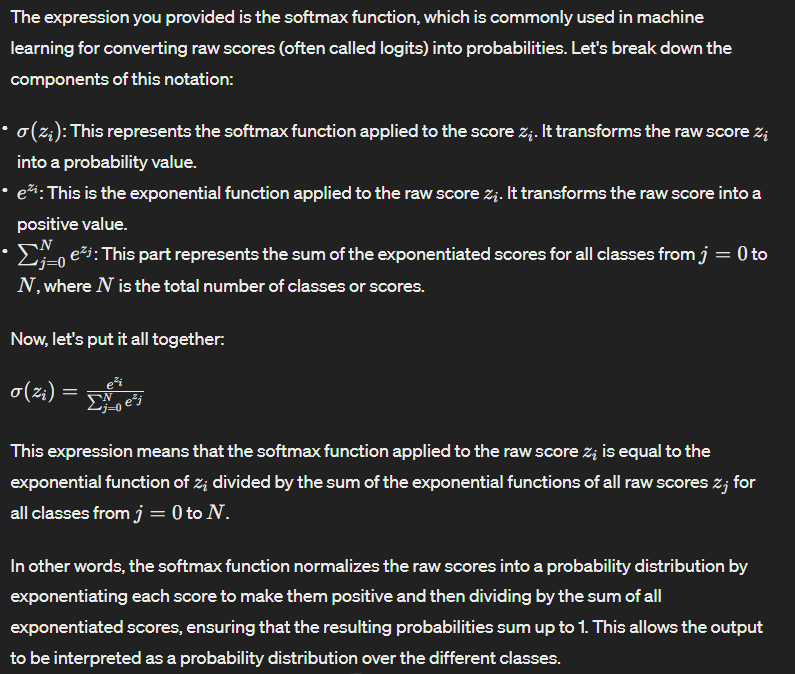

What you can do is you can introduce this data component which is your your temperature component. And as you make your temperature component very small, you take a distribution that looks kind of even, and you force it to only really choose the most logical one. As you increase that temperature component, all of a sudden it's much more likely that it could also pick if it's just randomly picking, um, fondue or cookie or pizza here. So that's what we mean by kind of creativity. If I set it to be really low, it means it's just going to pick the most logical choice. If I set it to be quite high. Um, here it's going to um, it might select some other kind of crazy option for me for this given instance. We very much want it to just pick the most logical one. 

So I've established what my large language model is. That's going to be the kind of brains of this chain. and I've established what my chain is going to be. And now I can put in a query saying, how does the author recommend that I keep studying after the book? So this is exactly what I've done before up here where I said it. Give me a similarity search with some information about Python classes. Now I'm just getting out the most relevant documents that pertain to this question. How does the author recommend I keep studying after the book? 

In [30]:
query = "How does the author recommend I keep studying after the book?"
docs = vector_db.similarity_search(query, k = 1)

And the final step that I can do is I can pass these docs straight into my chain. So what I can do here is I can do chain dot run and I can do, um, documents. What was the exact term again? Uh, input documents. It's just going to be the documents that I created. And then my query is going to be my query.

In [32]:
print(chain.run(input_documents=docs, question=query))

/home/tatchiwiggers/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 The author recommends keeping studying short, being careful with vocabulary, and building gradually to avoid trap doors.


It has found the most relevant documents, and then it's given those most relevant documents to a large language model with the prompt, you know, summarize this, give me the relevant information. And so rather than having to look through all of those documents, I can just get the answer here really nicely so I can interact with really large bodies of text by storing them in a vector database, and then just getting out really intuitive answers to questions that I might have. 

# Running LLMs locally/ privately

Running large language models (LLMs) locally or privately can be beneficial for several reasons:

1. **Data Privacy**: Keeping sensitive or proprietary data private is a significant concern for many organizations. By running LLMs locally or privately, you can ensure that your data remains within your own infrastructure and is not exposed to external entities, reducing the risk of data breaches or leaks.

2. **Fine-tuning on Specific Datasets**: Fine-tuning a pre-trained LLM on specific datasets tailored to your organization's needs can lead to improved performance for domain-specific tasks. By running LLMs locally, you have full control over the fine-tuning process and can customize it to suit your requirements without relying on external services.

3. **Resource Constraints**: Some organizations may have limitations on internet access, computational resources, or budget constraints that make it impractical or expensive to rely on cloud-based LLM services. Running LLMs locally allows you to leverage your existing infrastructure without incurring additional costs or dependencies on external services.

4. **Compliance Requirements**: Certain industries, such as healthcare or finance, have strict regulatory requirements regarding data handling and privacy. Running LLMs locally enables organizations to maintain compliance with regulatory standards by keeping sensitive data within their own secure environments.

5. **Reduced Latency**: In applications where real-time or low-latency responses are required, running LLMs locally can reduce the latency associated with sending requests to external services over the internet. This can be particularly important for interactive applications or systems with high throughput requirements.

6. **Offline Usage**: In scenarios where internet connectivity is intermittent or unavailable, running LLMs locally allows you to continue using the models without interruption. This is especially relevant in remote or offline environments where internet access is limited.

Overall, running LLMs locally or privately provides organizations with greater control, security, and flexibility over their natural language processing tasks while addressing concerns related to data privacy, compliance, resource constraints, and latency.

# Why Quantize?

Quantization is the process of reducing the precision of numerical values, typically by converting them from a higher precision format (e.g., 32-bit floating point) to a lower precision format (e.g., 16-bit floating point or even integers). Quantization is commonly used in machine learning to reduce the memory footprint and computational requirements of large models while minimizing the impact on performance. Here's why quantization is important:

1. **Reduced Memory Footprint**: As you mentioned, the memory requirements of storing and processing large models with billions of parameters can be enormous, especially when using 32-bit floating point precision. Quantizing the model parameters to lower precision formats significantly reduces the amount of memory needed to store the weights, activations, gradients, and other related information. This is crucial for deploying models on resource-constrained devices such as mobile phones or edge devices with limited memory capacity.

2. **Improved Computational Efficiency**: Lower precision formats require fewer computational resources to perform arithmetic operations compared to higher precision formats. This can lead to faster inference and training times, especially on hardware accelerators such as GPUs or TPUs, which are optimized for processing lower precision data. Quantization allows for more efficient use of computational resources, enabling faster execution of machine learning models.

3. **Scalability**: Large models with billions of parameters are becoming increasingly common in the field of deep learning, especially with the advent of transformer-based architectures like GPT (Generative Pre-trained Transformer). Quantization allows these models to be deployed and scaled more effectively by reducing the memory and computational requirements without sacrificing performance significantly.

4. **Energy Efficiency**: Lower precision arithmetic operations consume less power compared to higher precision operations, making quantized models more energy-efficient, particularly in battery-powered devices or data centers where energy consumption is a significant concern. Quantization helps reduce the energy consumption of inference and training processes, leading to cost savings and environmental benefits.

5. **Compatibility and Interoperability**: Quantization enables models to be deployed on a wider range of hardware platforms, including those with limited support for higher precision formats. By converting models to lower precision, they become more compatible and interoperable across different hardware architectures, allowing for easier deployment and distribution in heterogeneous environments.

In summary, quantization is essential for making large machine learning models more memory-efficient, computationally efficient, scalable, energy-efficient, and compatible with a variety of hardware platforms, ultimately enabling their deployment in real-world applications and environments.

In [34]:
output = llm("Q: How large is the earth's diameter? A: ", 
             max_tokens=200,  
             echo=True)
print(output["choices"])

This code snippet appears to be making use of a large language model (LLM) to generate text based on a prompt/question provided as input. Let's break down what each part of the code does:

1. **Language Model Invocation**:
   ```python
   output = llm("Q: How large is the earth's diameter? A: ", 
                max_tokens=200,  
                echo=True)
   ```
   This line invokes the LLM with a prompt/question as input. Here's what each argument does:
   - `"Q: How large is the earth's diameter? A: "`: This is the prompt/question provided to the LLM. It serves as the initial input to the model, guiding its generation process.
   - `max_tokens=200`: This parameter specifies the maximum number of tokens (words or subwords) the LLM should generate in response to the input prompt. In this case, the maximum limit is set to 200 tokens.
   - `echo=True`: This parameter indicates that the prompt/question should be included in the output generated by the LLM. When set to `True`, the generated text will include the original prompt/question followed by the model's response.

2. **Printing the Output**:
   ```python
   print(output["choices"])
   ```
   This line prints the output generated by the LLM. The output is typically a dictionary containing information about the generated text. In this case, `output["choices"]` likely contains a list of choices or responses provided by the model in response to the input prompt/question.

Overall, this code snippet demonstrates how to use a large language model to generate text based on a given prompt/question and print the resulting output. The LLM processes the input prompt and produces a response, which is then printed to the console. The `echo=True` parameter ensures that the original prompt/question is included in the output for context.

# Running multi-modal models yourself (Colab recommended)

The code you've shared is a Python script that leverages the `diffusers` library to instantiate and use a text-to-image model, specifically the "runwayml/stable-diffusion-v1-5" model, to generate images based on textual descriptions. This script is intended for use in an environment with GPU support, such as Google Colab, for efficient processing. Let's break down what each part of the script does:

1. **Import Statements**:
    - `from diffusers import AutoPipelineForText2Image`: This line imports the `AutoPipelineForText2Image` class from the `diffusers` library. The `diffusers` library provides a collection of pre-trained models and pipelines for tasks such as text-to-image generation, image-to-image translation, and more.
    - `import torch`: Imports the PyTorch library. PyTorch is an open-source machine learning library used for applications such as computer vision and natural language processing. It is particularly known for its flexibility and speed in deep learning applications.

2. **Model Initialization**:
    - The `AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True)` line is where the model pipeline for generating images from text is instantiated. This specific model, "runwayml/stable-diffusion-v1-5", is a version of the Stable Diffusion model, which is capable of generating high-quality images based on textual input.
        - `from_pretrained`: This method loads a pre-trained model given its identifier. In this case, "runwayml/stable-diffusion-v1-5" refers to a specific version of the Stable Diffusion model.
        - `torch_dtype=torch.float16`: This parameter specifies the data type for the tensors. Using `float16` (also known as half-precision floating-point) reduces memory usage and can speed up computation on compatible GPUs, at the potential cost of a slight decrease in precision.
        - `use_safetensors=True`: This parameter indicates that the model should use SafeTensors, a format that ensures the tensors are processed in a way that maximizes memory efficiency and safety.

3. **Device Allocation**:
    - `.to("cuda")`: This part of the code moves the model to a CUDA-capable GPU device for computation. Using a GPU significantly accelerates the model inference, especially for intensive tasks like image generation.

By running this script in an environment with a CUDA-capable GPU (like Google Colab), you can generate images based on textual descriptions efficiently. The script sets up the necessary configurations for using a specific pre-trained text-to-image model with optimized settings for performance and memory usage.

In [36]:
prompt = "A Renaissance painting of the Eiffel tower"
pipeline(prompt, num_inference_steps=30).images[0]

This line of code generates an image based on the textual description provided in the `prompt` variable, using the text-to-image model pipeline initialized in the previous steps. Here's a breakdown of what this specific line does:

- **Prompt Variable**: `prompt = "A Renaissance painting of the Eiffel tower"` sets the variable `prompt` to a string that describes the image you want to generate. In this case, the description is asking for an image that looks like a Renaissance painting of the Eiffel Tower. The Renaissance style refers to the art movement that occurred in Europe from the 14th to the 17th century, characterized by an emphasis on classical art, symmetry, and harmony. This prompt suggests combining the architectural modernity of the Eiffel Tower with the aesthetic qualities of Renaissance art.

- **Generating the Image**: `pipeline(prompt, num_inference_steps=30).images[0]` uses the `pipeline` object (which is an instance of `AutoPipelineForText2Image` configured to use the "runwayml/stable-diffusion-v1-5" model) to generate an image based on the `prompt`. The method takes the following parameters:
  - The `prompt` string, which describes what the generated image should depict.
  - `num_inference_steps=30` specifies the number of inference steps to use when generating the image. The number of steps can affect the quality and coherence of the generated image; a higher number of steps often results in more detailed and accurate representations, but also requires more computational resources and time.

- **Accessing the Generated Image**: The `.images[0]` part of the code accesses the first image in the list of generated images. The `pipeline` call returns an object that includes a `.images` attribute, which is a list of the images generated by the model. Since in this case we are interested in the first (and presumably only) image generated based on the prompt, we access it using `[0]`.

In summary, this line of code tells the text-to-image model to create an image that interprets the Eiffel Tower in the style of a Renaissance painting, using a specified number of steps to refine the image generation process. The result is then accessed as the first element of the list of generated images, ready to be displayed or further processed.